In [23]:
from scipy.interpolate import make_interp_spline

import pandas as pd
import glob
from utils import convert_csv_to_graph
from network import get_network_stats
import networkx as nx
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
from utils import smooth
from data import get_MIM_df, get_MIM_df_no_merge


In [24]:
sns.set_style('darkgrid')  # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text
palette = sns.color_palette()


In [25]:
# We set the w for the base case to be 25
mim1_b2_mdf, mim1_b2_adf = get_MIM_df('1_w=25')
mim2_b2_mdf, mim2_b2_adf = get_MIM_df('2_w=25')
mim3_b2_mdf, mim3_b2_adf = get_MIM_df('3_w=25')

mim1_b10_mdf, mim1_b10_adf = get_MIM_df('1_b=10')
mim2_b10_mdf, mim2_b10_adf = get_MIM_df('2_b=10')
mim3_b10_mdf, mim3_b10_adf = get_MIM_df('3_b=10')


mim1_b2_mdf_nm, mim1_b2_adf_nm = get_MIM_df_no_merge('1_w=25')
mim2_b2_mdf_nm, mim2_b2_adf_nm = get_MIM_df_no_merge('2_w=25')
mim3_b2_mdf_nm, mim3_b2_adf_nm = get_MIM_df_no_merge('3_w=25')

mim1_b10_mdf_nm, mim1_b10_adf_nm = get_MIM_df_no_merge('1_b=10')
mim2_b10_mdf_nm, mim2_b10_adf_nm = get_MIM_df_no_merge('2_b=10')
mim3_b10_mdf_nm, mim3_b10_adf_nm = get_MIM_df_no_merge('3_b=10')


<Figure size 640x480 with 0 Axes>

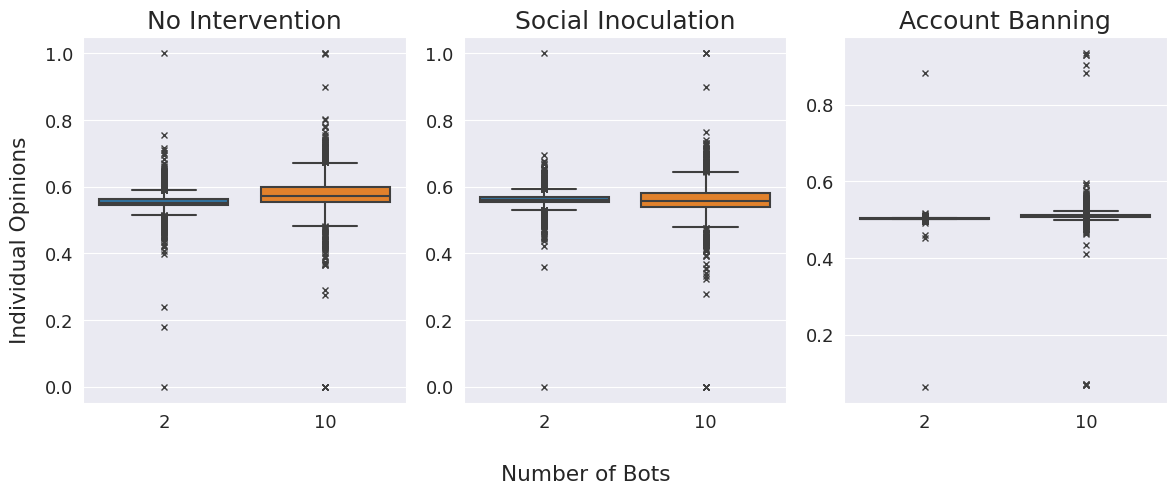

In [26]:
# we need to get a distribution of agent opinions of each experiment
# by working out the average long-run opinion of each agent across 10 experiments

plt.tight_layout()
# TODO: we need to find out the average of agentdf during the last 200 iterations

# We establish the x-axis as w, y axis
# as the distributions of average opinions at te last iterations

num_agent = 1069

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

bfps = [2, 10]

x = sum([[bfp] * num_agent for bfp in bfps], [])

# TODO: concatenate rows
mim1_y = list(pd.concat([mim1_b2_adf['opinion'][-num_agent:], mim1_b10_adf['opinion'][-num_agent:],
                         ], axis=0, ignore_index=True, sort=False,))

mim2_y = list(pd.concat([mim2_b2_adf['opinion'][-num_agent:], mim2_b10_adf['opinion'][-num_agent:],
                         ], axis=0, ignore_index=True, sort=False,))

mim3_y = list(pd.concat([mim3_b2_adf['opinion'][-num_agent:], mim3_b10_adf['opinion'][-num_agent:],
                         ], axis=0, ignore_index=True, sort=False))


# axes[0].set_ylim(0.4, 0.6)
# axes[1].set_ylim(0.4, 0.6)
# axes[2].set_ylim(0.4, 0.6)

sns.boxplot(x=x, y=mim1_y, ax=axes[0], flierprops={'marker': 'x', }).set_title('No Intervention')
sns.boxplot(x=x, y=mim2_y, ax=axes[2], flierprops={'marker': 'x', }).set_title('Account Banning')
sns.boxplot(x=x, y=mim3_y, ax=axes[1], flierprops={'marker': 'x', }).set_title('Social Inoculation')


fig.supylabel('Individual Opinions')

fig.supxlabel('Number of Bots')



plt.tight_layout()


plt.savefig('data/graphs/exp3_op_box.png', dpi=500)


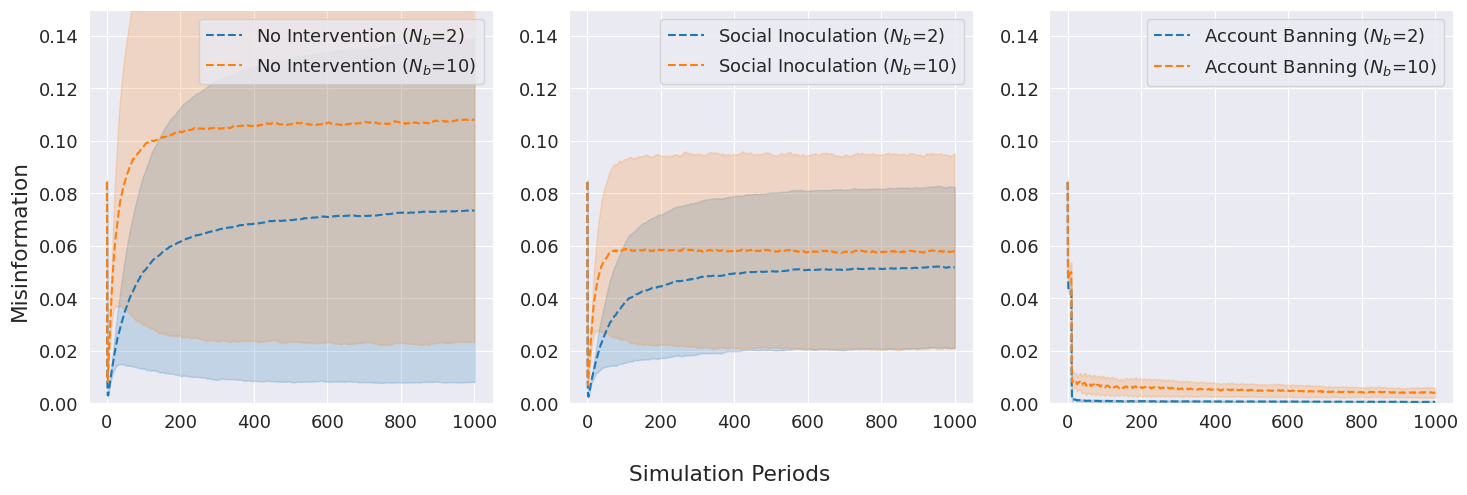

In [27]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
x = np.linspace(0, 1000, 1000)

mim1_b2_y = mim1_b2_mdf['misinformation']
mim1_b10_y = mim1_b10_mdf['misinformation']

mim2_b2_y = mim2_b2_mdf['misinformation']
mim2_b10_y = mim2_b10_mdf['misinformation']

mim3_b2_y = mim3_b2_mdf['misinformation']
mim3_b10_y = mim3_b10_mdf['misinformation']


mim1_b2_std = np.std([mdf['misinformation'] for mdf in mim1_b2_mdf_nm], axis=0)
mim1_b10_std = np.std([mdf['misinformation'] for mdf in mim1_b10_mdf_nm], axis=0)

mim2_b2_std = np.std([mdf['misinformation'] for mdf in mim2_b2_mdf_nm], axis=0)
mim2_b10_std = np.std([mdf['misinformation'] for mdf in mim2_b10_mdf_nm], axis=0)

mim3_b2_std = np.std([mdf['misinformation'] for mdf in mim3_b2_mdf_nm], axis=0)
mim3_b10_std = np.std([mdf['misinformation'] for mdf in mim3_b10_mdf_nm], axis=0)



axes[0].plot(x, smooth(mim1_b2_y, 0), '--', label=r'No Intervention ($N_b$=2)')
axes[0].plot(x, smooth(mim1_b10_y, 0), '--', label=r'No Intervention ($N_b$=10)')

axes[2].plot(x, smooth(mim2_b2_y, 0), '--', label=r'Account Banning ($N_b$=2)')
axes[2].plot(x, smooth(mim2_b10_y, 0), '--', label=r'Account Banning ($N_b$=10)')

axes[1].plot(x, smooth(mim3_b2_y, 0), '--', label=r'Social Inoculation ($N_b$=2)')
axes[1].plot(x, smooth(mim3_b10_y, 0), '--', label=r'Social Inoculation ($N_b$=10)')

axes[0].fill_between(x, mim1_b2_y - mim1_b2_std, mim1_b2_y + mim1_b2_std, color=palette[0], alpha=0.2)
axes[0].fill_between(x, mim1_b10_y - mim1_b10_std, mim1_b10_y + mim1_b10_std, color=palette[1], alpha=0.2)

axes[1].fill_between(x, mim3_b2_y - mim3_b2_std, mim3_b2_y + mim3_b2_std, color=palette[0], alpha=0.2)
axes[1].fill_between(x, mim3_b10_y - mim3_b10_std, mim3_b10_y + mim3_b10_std, color=palette[1], alpha=0.2)

axes[2].fill_between(x, mim2_b2_y - mim2_b2_std, mim2_b2_y + mim2_b2_std, color=palette[0], alpha=0.2)
axes[2].fill_between(x, mim2_b10_y - mim2_b10_std, mim2_b10_y + mim2_b10_std, color=palette[1], alpha=0.2)


axes[0].legend(loc='best')
axes[1].legend(loc='best')
axes[2].legend(loc='best')


axes[0].set_ylim(0, 0.15)
axes[1].set_ylim(0, 0.15)
axes[2].set_ylim(0, 0.15)


fig.supylabel('Misinformation')
fig.supxlabel('Simulation Periods')
# ax.set_title('Misinformation changes under \n different intervention methods')


plt.tight_layout()
plt.savefig('data/graphs/exp3_misinf_line.png', dpi=500)


## Experiment 3 - 1 (inoculation rate) VS Experiment 3 - 2 (inoculation range)

In [28]:
# mim1_nointerv_mdf, _ = get_MIM_df('1_w=25')

mim3_irate02_mdf, _ = get_MIM_df('3_irate=0.2')
mim3_irate05_mdf, _ = get_MIM_df('3_irate=0.5')
mim3_irate08_mdf, _ = get_MIM_df('3_irate=0.8')

mim3_irange0109_mdf, _ = get_MIM_df('3_irange=0.1-0.9')
mim3_irange0208_mdf, _ = get_MIM_df('3_irange=0.2-0.8')
mim3_irange0307_mdf, _ = get_MIM_df('3_irange=0.3-0.7')

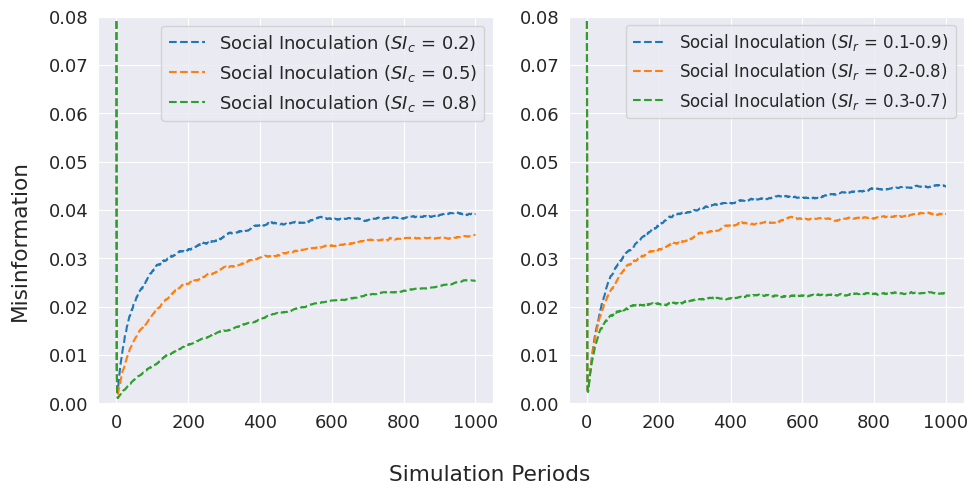

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))


#---------------------------------------------------------------------------
#                                   IRATE
#---------------------------------------------------------------------------


fig.supylabel('Misinformation')
fig.supxlabel('Simulation Periods')

x = np.linspace(0, 1000, 1000)

# mim1_nointerv_y = mim1_nointerv_mdf['misinformation']


mim3_irate02_y = mim3_irate02_mdf['misinformation']
mim3_irate05_y = mim3_irate05_mdf['misinformation']
mim3_irate08_y = mim3_irate08_mdf['misinformation']

axes[0].plot(x, smooth(mim3_irate02_y, 0),'--', label=r'Social Inoculation ($SI_{c}$ = 0.2)')
axes[0].plot(x, smooth(mim3_irate05_y, 0),'--', label=r'Social Inoculation ($SI_{c}$ = 0.5)')
axes[0].plot(x, smooth(mim3_irate08_y, 0), '--', label=r'Social Inoculation ($SI_{c}$ = 0.8)')


#---------------------------------------------------------------------------
#                                   IRANGE
#---------------------------------------------------------------------------

mis3_irange0109_y = mim3_irange0109_mdf['misinformation']
mis3_irange0208_y = mim3_irange0208_mdf['misinformation']
mis3_irange0307_y = mim3_irange0307_mdf['misinformation']

axes[1].plot(x, smooth(mis3_irange0109_y, 0), '--', label=r'Social Inoculation ($SI_{r}$ = 0.1-0.9)')
axes[1].plot(x, smooth(mis3_irange0208_y, 0),'--', label=r'Social Inoculation ($SI_{r}$ = 0.2-0.8)')
axes[1].plot(x, smooth(mis3_irange0307_y, 0),'--', label=r'Social Inoculation ($SI_{r}$ = 0.3-0.7)')


axes[0].set_ylim(0, 0.08)
axes[1].set_ylim(0, 0.08)

axes[0].legend(loc='best')
axes[1].legend(loc='best')
axes[1].legend(loc='best',prop={'size': 12})

# ax.set_title('Misinformation changes under \n different intervention methods')
plt.tight_layout()

plt.savefig('data/graphs/exp3_misinf_bs+ap.png', dpi=500)


## Polarization

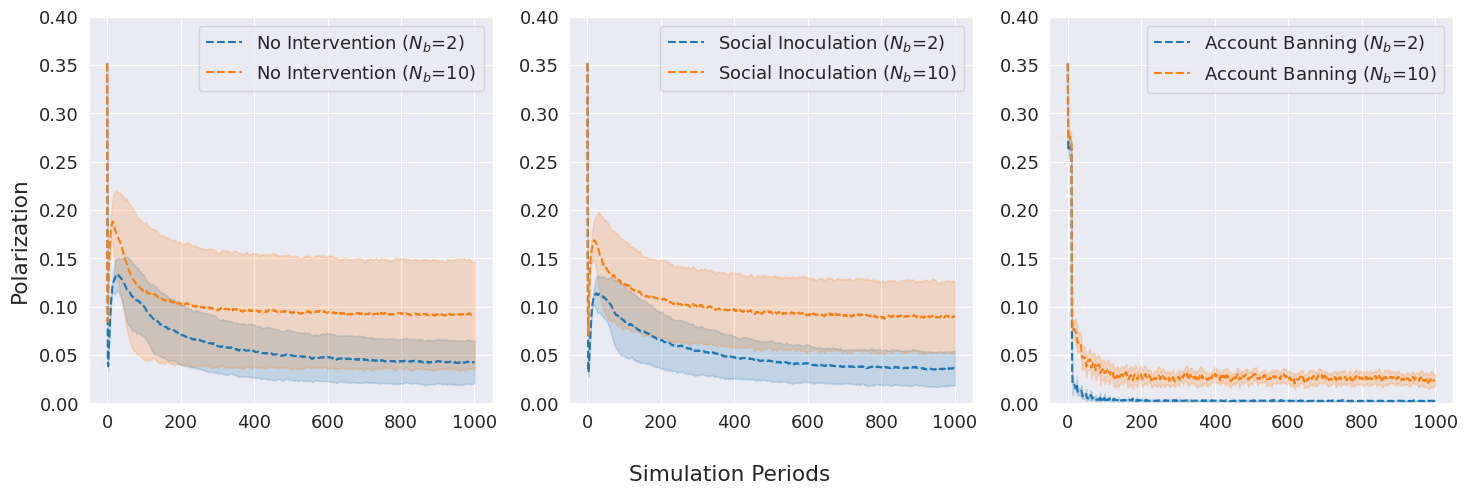

In [30]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
x = np.linspace(0, 1000, 1000)

mim1_b2_y = mim1_b2_mdf['polarization']
mim1_b10_y = mim1_b10_mdf['polarization']

mim2_b2_y = mim2_b2_mdf['polarization']
mim2_b10_y = mim2_b10_mdf['polarization']

mim3_b2_y = mim3_b2_mdf['polarization']
mim3_b10_y = mim3_b10_mdf['polarization']


mim1_b2_std = np.std([mdf['polarization'] for mdf in mim1_b2_mdf_nm], axis=0)
mim1_b10_std = np.std([mdf['polarization'] for mdf in mim1_b10_mdf_nm], axis=0)

mim2_b2_std = np.std([mdf['polarization'] for mdf in mim2_b2_mdf_nm], axis=0)
mim2_b10_std = np.std([mdf['polarization'] for mdf in mim2_b10_mdf_nm], axis=0)

mim3_b2_std = np.std([mdf['polarization'] for mdf in mim3_b2_mdf_nm], axis=0)
mim3_b10_std = np.std([mdf['polarization'] for mdf in mim3_b10_mdf_nm], axis=0)



axes[0].plot(x, smooth(mim1_b2_y, 0), '--', label=r'No Intervention ($N_b$=2)')
axes[0].plot(x, smooth(mim1_b10_y, 0), '--', label=r'No Intervention ($N_b$=10)')

axes[2].plot(x, smooth(mim2_b2_y, 0), '--', label=r'Account Banning ($N_b$=2)')
axes[2].plot(x, smooth(mim2_b10_y, 0), '--', label=r'Account Banning ($N_b$=10)')

axes[1].plot(x, smooth(mim3_b2_y, 0), '--', label=r'Social Inoculation ($N_b$=2)')
axes[1].plot(x, smooth(mim3_b10_y, 0), '--', label=r'Social Inoculation ($N_b$=10)')

axes[0].fill_between(x, mim1_b2_y - mim1_b2_std, mim1_b2_y + mim1_b2_std, color=palette[0], alpha=0.2)
axes[0].fill_between(x, mim1_b10_y - mim1_b10_std, mim1_b10_y + mim1_b10_std, color=palette[1], alpha=0.2)

axes[1].fill_between(x, mim3_b2_y - mim3_b2_std, mim3_b2_y + mim3_b2_std, color=palette[0], alpha=0.2)
axes[1].fill_between(x, mim3_b10_y - mim3_b10_std, mim3_b10_y + mim3_b10_std, color=palette[1], alpha=0.2)

axes[2].fill_between(x, mim2_b2_y - mim2_b2_std, mim2_b2_y + mim2_b2_std, color=palette[0], alpha=0.2)
axes[2].fill_between(x, mim2_b10_y - mim2_b10_std, mim2_b10_y + mim2_b10_std, color=palette[1], alpha=0.2)

axes[0].legend(loc='best')
axes[1].legend(loc='best')
axes[2].legend(loc='best')


axes[0].set_ylim(0, 0.40)
axes[1].set_ylim(0, 0.40)
axes[2].set_ylim(0, 0.40)


fig.supylabel('Polarization')
fig.supxlabel('Simulation Periods')
# ax.set_title('Misinformation changes under \n different intervention methods')


plt.tight_layout()
plt.savefig('data/graphs/exp3_pol_line.png', dpi=500)
